In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 傅利葉級數

傅利葉認為, 所有函數 $f(x) = \mathbb{R} \to \mathbb{R}$ (事實上是要有週期性等等) 都可以表為:

$$f(x) = a_0 + a_1 \sin(\omega t) + b_1 \cos(\omega t) + a_2 \sin(2\omega t) + b_2 \cos(2 \omega t) + \cdots$$

### [練習]

假設有個函數, 我們知道若干點的值:

| $t$  | $f(t)$ |
| ---  | ---    |
| 0    | 14     |
| 1    | 18.7   |
| 2    | 9      |
| 3    | 4.1    |
| 4    | 6.7    |
| 5    | 6      |
| 6    | 6.3    |
| 7    | 8.4    |
| 8    | 4      |
| 9    | 2.9    |

* 出自《數學嗆聲班》(天下文化) 的例子。

In [30]:
x = np.arange(10)
y = np.array([14, 18.7, 9, 4.1, 6.7, 6, 6.3, 8.4, 4, 2.9])

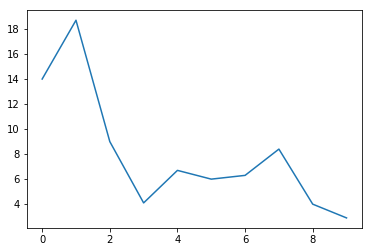

In [31]:
plt.plot(x,y)

### 平滑化我們的函數

我們可以用 cubic spline (就是局部都用一個三次多項式去模擬我們的函數), 造一個新的函數叫 smooth。這新的函數要是, 嗯, smooth, 而且過去的一些點代入都要是「正確的」。

注意我們事實上是一個週期函數, 所以應該還有個點 $(10,14)$ 也就是接回原來起始, 即 $f(0) = f(10)$。

In [32]:
from scipy.interpolate import interp1d


smooth =  interp1d(np.append(x, [10]), np.append(y, [14]), 'cubic')

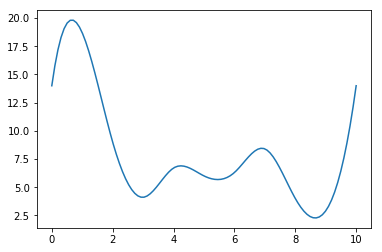

In [33]:
xnew = np.linspace(0, 10, 100)
plt.plot(xnew, smooth(xnew))

檢查是否過原本所有點...

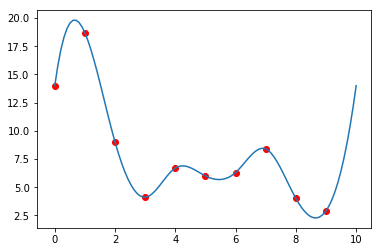

In [34]:
xnew = np.linspace(0, 10, 100)
plt.plot(xnew, smooth(xnew))
plt.scatter(x,y,c='r')

### 計算 $a_0$

我們知道這函數的週期 $T=10$

回憶一下, 

$$\omega = 2\pi f = 2\pi \dfrac{1}{T}$$

$$f(x) = a_0 + \sum_{n=1}^\infty a_n \sin(n\cdot \omega t) + b_n \cos(n \cdot\omega t)$$

也就是

$$f(x) = a_0 + \sum_{n=1}^\infty a_n \sin(\dfrac{2n\pi}{T}  t) + b_n \cos(\dfrac{2n\pi}{T} t)$$

如果我們計算 $f(t)$, 由 $0$ 到 $T$ 的面積, 也就是

$$\int_0^T f(t) \, dt$$

我們會發現右邊幾乎都是 $0$, 只留下...

$$a_0 T$$

所以,

$$a_0 = \dfrac{\int_0^T f(t) \, dt}{T}$$

我們現在還不會 (?) 積分, 就像前面分割成長方型, 然後加一加!

### 面積怎麼算?

<BarContainer object of 10 artists>

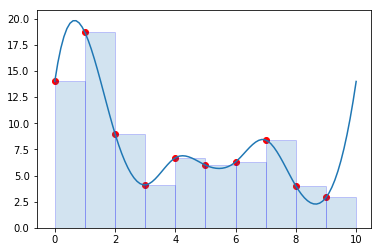

In [35]:
xnew = np.linspace(0, 10, 100)
plt.plot(xnew, smooth(xnew))
plt.scatter(x,y,c='r')
plt.bar(x,y,width=1,alpha=0.2,align='edge',edgecolor='b')

$$ y = [y_0, y_1, \ldots, y_9] $$

第一個長方型面積 $y_0 \times 1 = y_0$

第二個長方型面積 $y_1 \times 1 = y_1$

等等, 所以所有長方型面積剛好是把這些值都加起來。

In [78]:
T = 10
A = y.sum()

<BarContainer object of 10 artists>

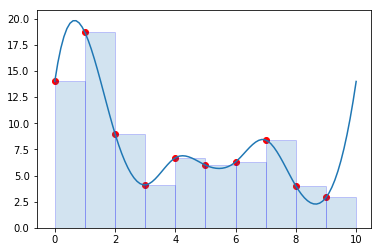

In [79]:
xnew = np.linspace(0, 10, 100)
plt.plot(xnew, smooth(xnew))
plt.scatter(x,y,c='r')
plt.bar(x,y,width=1,alpha=0.2,align='edge',edgecolor='b')

In [80]:
a0 = A/T

In [81]:
a0

8.010000000000002

### 積分當然可以

如果我們不是取 10 個 sample, scipy 也提供數值積分的方式。

我們當然可以用 `scipy` 提供的數值積分方式!

In [82]:
from scipy.integrate import quad

In [83]:
def integrand(x):
    return smooth(x).item()

In [84]:
Af = quad(integrand, 0, T)[0]

In [85]:
Af/T

8.007878007845596

### 計算 $a_n, n\geq 1$

我們需要想辦法算其他的系數, 我們觀察一件巧妙的事...

$$\sin(k\omega t) \cdot \sin(n\omega t)$$

我們會發現, $k=n$ 時積分

$$\int_0^T \sin(k\omega t) \cdot \sin(n\omega t) \, dt$$

才不是 0, 否則 $k\neq n$ 時積分都會是 0!

In [95]:
def mplot(k, n):
    t = np.linspace(0, T, 200)
    
    plt.subplot(3,1,1)
    plt.plot(t, np.sin(2*k*np.pi/T*t))
    plt.plot([-0.2, 10.2], [0, 0], 'r')

    plt.subplot(3,1,2)
    plt.plot(t, np.sin(2*n*np.pi/T*t))
    plt.plot([-0.2, 10.2], [0, 0], 'r')

    plt.subplot(3,1,3)
    plt.plot(t, np.sin(2*k*np.pi/T*t)*np.sin(2*n*np.pi/T*t))
    plt.plot([-0.2, 10.2], [0, 0], 'r')

In [99]:
from ipywidgets import interact

In [100]:
interact(mplot, k=(1,10), n=(1,10))

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), IntSlider(value=5, description='n', …

<function __main__.mplot(k, n)>

於是, 如果我們想知道 $a_n$ 是多少, 我們可以把下列式子兩方都乘以 $\sin(n\omega t)$, 然後由 $0$ 到 $T$ 積分

$$f(x) = a_0 + \sum_{n=1}^\infty a_n \sin(n\cdot \omega t) + b_n \cos(n \cdot\omega t)$$

最後留下來的是:

$$\int_0^T f(t) \, dt = a_n \int_0^T \sin^2(n\cdot \omega t) \, dt = a_n \dfrac{T}{2}$$

於是

$$a_n = \dfrac{2\int_0^T f(t)}{T}$$

### 計算 $a_1$

首先我們要計算

$$f(t)\sin(\omega t)$$

<BarContainer object of 10 artists>

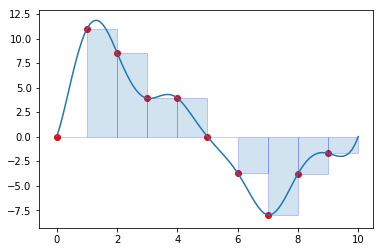

In [103]:
plt.plot(xnew, smooth(xnew)*np.sin(2*np.pi/T * xnew))
plt.scatter(x, y*np.sin(2*np.pi/T * x), c='r')
plt.bar(x, y*np.sin(2*np.pi/T * x), width=1, alpha=0.2, align='edge', edgecolor='b')

In [104]:
ya1 = y*np.sin(2*np.pi/T * x)

In [106]:
Aa1= ya1.sum()

In [107]:
a1 = 2*Aa1/T

In [108]:
a1

2.037572129708935

### 看看目前學得怎樣?

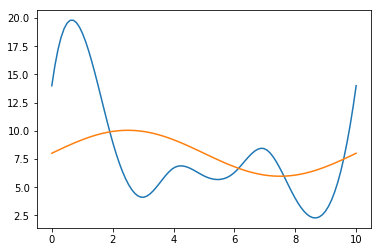

In [109]:
plt.plot(xnew, smooth(xnew))
plt.plot(xnew, a0 + a1*np.sin(2*np.pi/T * xnew))

現在只用了常數 + 一個 sin, 自然還差很遠...

### 計算 $a_2, a_3, a_4, a_5$

基本上和 $a_1$ 是相同的, 所以我們一起來算!

In [117]:
ya = np.array([y*np.sin(2*n*np.pi/T * x) for n in range(2,6)])

In [118]:
Aa = ya.sum(axis=1)

In [120]:
a2, a3, a4, a5 = 2*Aa/T

### 計算  $b_1, b_2, b_3. b_4, b_5$

In [122]:
yb = np.array([y*np.cos(2*n*np.pi/T * x) for n in range(1,6)])

In [123]:
Ab = yb.sum(axis=1)

In [124]:
b1, b2, b3, b4, b5 = 2*Ab/T

### 看看我們可愛的傅利葉目前如何?

In [143]:
yf = a0 + a1*np.sin(2*np.pi/T * xnew) + a2*np.sin(2*2*np.pi/T * xnew) + a3*np.sin(2*3*np.pi/T * xnew)\
+ a4*np.sin(2*4*np.pi/T * xnew) + b1*np.cos(2*np.pi/T * xnew) + b2*np.cos(2*2*np.pi/T * xnew)\
+ b3*np.cos(2*3*np.pi/T * xnew) + b4*np.cos(2*4*np.pi/T * xnew)\
+ b5*np.cos(2*5*np.pi/T * xnew)

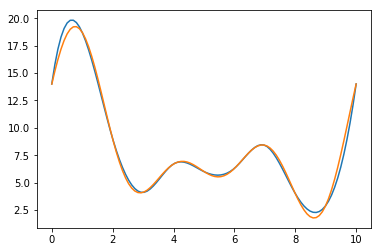

In [144]:
plt.plot(xnew, smooth(xnew))
plt.plot(xnew, yf)

是不是相當有樣子了!?